In [1]:
# Import Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from fbprophet import Prophet
# Statsmodels widely known for forecasting than Prophet
import statsmodels.api as sm
from scipy import stats



C:\Users\Asus\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# plt.style.available
plt.style.use("seaborn-whitegrid")

In [3]:
df = pd.read_csv('GOOG.csv', sep=";")
df.head(8)

,date,open,high,low,close,adj close,volume,Name
0,02/01/2015,527.561584,529.815369,522.665039,523.373108,523.373108,1447500,GOOGL
1,05/01/2015,521.827332,522.894409,511.655243,512.463013,512.463013,2059800,GOOGL
2,06/01/2015,513.589966,514.761719,499.678131,500.585632,500.585632,2899900,GOOGL
3,07/01/2015,505.611847,505.855164,498.281952,499.727997,499.727997,2065000,GOOGL
4,08/01/2015,496.626526,502.101471,489.655640,501.303680,501.303680,3353500,GOOGL
5,09/01/2015,503.377991,503.537537,493.435272,494.811493,494.811493,2071300,GOOGL
6,12/01/2015,493.584869,494.618011,486.225067,491.201416,491.201416,2326700,GOOGL
7,13/01/2015,497.474182,501.602844,491.041840,494.821472,494.821472,2370400,GOOGL


In [4]:
# Brief Description of our dataset
df.describe()

,open,high,low,close,adj close,volume
count,1467.000000,1467.000000,1467.000000,1467.000000,1467.000000,1.467000e+03
mean,985.834951,995.268432,976.619268,986.350004,986.350004,1.740431e+06
std,282.636110,286.496731,279.468429,283.167303,283.167303,8.399581e+05
min,493.295654,494.618011,486.225067,491.201416,491.201416,3.475000e+05
25%,749.204987,754.614990,741.850007,748.340027,748.340027,1.243950e+06
50%,1017.250000,1031.739990,1007.500000,1019.969971,1019.969971,1.527900e+06
75%,1180.500000,1191.604981,1169.080017,1183.669983,1183.669983,1.974750e+06
max,1709.713989,1733.180054,1666.329956,1728.280029,1728.280029,1.116490e+07


In [5]:
# Replace the column name from name to ticks
df = df.rename(columns={'Name': 'Ticks'})

In [6]:
# Let's analyze some of the stocks.
google = df.loc[df['Ticks'] == 'GOOGL']
google.head()

,date,open,high,low,close,adj close,volume,Ticks
0,02/01/2015,527.561584,529.815369,522.665039,523.373108,523.373108,1447500,GOOGL
1,05/01/2015,521.827332,522.894409,511.655243,512.463013,512.463013,2059800,GOOGL
2,06/01/2015,513.589966,514.761719,499.678131,500.585632,500.585632,2899900,GOOGL
3,07/01/2015,505.611847,505.855164,498.281952,499.727997,499.727997,2065000,GOOGL
4,08/01/2015,496.626526,502.101471,489.655640,501.303680,501.303680,3353500,GOOGL


In [7]:
google.info() # Check whether the date is as object type or date type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1467 entries, 0 to 1466
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1467 non-null   object 
 1   open       1467 non-null   float64
 2   high       1467 non-null   float64
 3   low        1467 non-null   float64
 4   close      1467 non-null   float64
 5   adj close  1467 non-null   float64
 6   volume     1467 non-null   int64  
 7   Ticks      1467 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 103.1+ KB


In [8]:
google.head()

,date,open,high,low,close,adj close,volume,Ticks
0,02/01/2015,527.561584,529.815369,522.665039,523.373108,523.373108,1447500,GOOGL
1,05/01/2015,521.827332,522.894409,511.655243,512.463013,512.463013,2059800,GOOGL
2,06/01/2015,513.589966,514.761719,499.678131,500.585632,500.585632,2899900,GOOGL
3,07/01/2015,505.611847,505.855164,498.281952,499.727997,499.727997,2065000,GOOGL
4,08/01/2015,496.626526,502.101471,489.655640,501.303680,501.303680,3353500,GOOGL


In [9]:
# Create a copy to avoid the SettingWarning .loc issue 
google_df = google.copy()
# Change to datetime datatype.
google_df.loc[:, 'date'] = pd.to_datetime(google.loc[:,'date'], format="%d/%m/%Y")

In [10]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1467 entries, 0 to 1466
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1467 non-null   datetime64[ns]
 1   open       1467 non-null   float64       
 2   high       1467 non-null   float64       
 3   low        1467 non-null   float64       
 4   close      1467 non-null   float64       
 5   adj close  1467 non-null   float64       
 6   volume     1467 non-null   int64         
 7   Ticks      1467 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 103.1+ KB


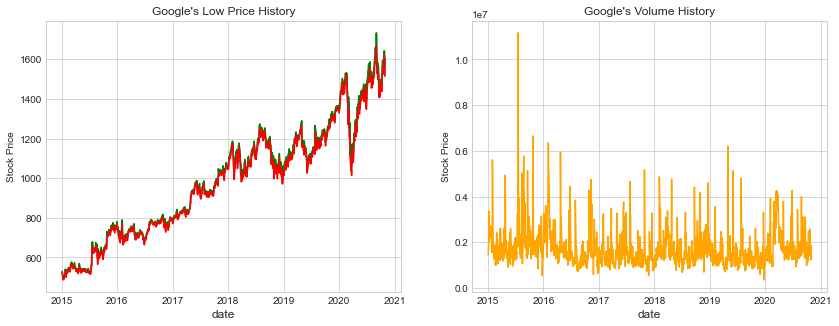

In [11]:
# Simple plotting of Amazon Stock Price
# First Subplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(google_df["date"], google_df["close"])
ax1.set_xlabel("date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Google's Close Price History")

# Second Subplot
ax1.plot(google_df["date"], google_df["high"], color="green")
ax1.set_xlabel("date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Google's High Price History")

# Third Subplot
ax1.plot(google_df["date"], google_df["low"], color="red")
ax1.set_xlabel("date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Google's Low Price History")

# Fourth Subplot
ax2.plot(google_df["date"], google_df["volume"], color="orange")
ax2.set_xlabel("date", fontsize=12)
ax2.set_ylabel("Stock Price")
ax2.set_title("Google's Volume History")
plt.show()

In [12]:
m = Prophet()

# Drop the columns
ph_df = google_df.drop(['open', 'high', 'low','volume','adj close', 'Ticks'], axis=1)
ph_df.rename(columns={'close': 'y', 'date': 'ds'}, inplace=True)

ph_df.head()

,ds,y
0,2015-01-02,523.373108
1,2015-01-05,512.463013
2,2015-01-06,500.585632
3,2015-01-07,499.727997
4,2015-01-08,501.303680


In [13]:
ph_df.tail()

,ds,y
1462,2020-10-22,1615.329956
1463,2020-10-23,1641.000000
1464,2020-10-26,1590.449951
1465,2020-10-27,1604.260010
1466,2020-10-28,1516.619995


In [14]:
m = Prophet()

m.fit(ph_df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
# Create Future dates
future_prices = m.make_future_dataframe(periods=365)

# Predict Prices
forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1827,2021-10-24,1869.573260,1751.374291,1995.769732
1828,2021-10-25,1851.108443,1723.917266,1982.303015
1829,2021-10-26,1853.502062,1728.457723,1981.767504
1830,2021-10-27,1855.761668,1728.044607,1988.111069
1831,2021-10-28,1857.155725,1725.144296,1990.362569


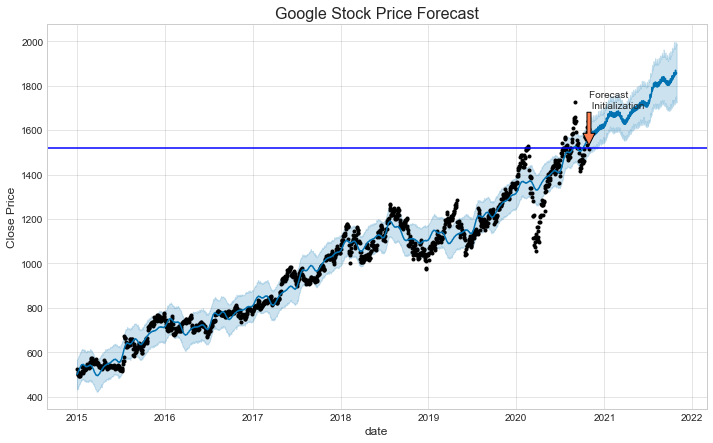

In [27]:
import matplotlib.dates as mdates

# Dates
starting_date = dt.datetime(2020, 10, 29)
starting_date1 = mdates.date2num(starting_date)

pointing_arrow = dt.datetime(2020, 10, 29)
pointing_arrow1 = mdates.date2num(pointing_arrow)

# Learn more Prophet tomorrow and plot the forecast for amazon.
fig = m.plot(forecast)
ax1 = fig.add_subplot(111)
ax1.set_title("Google Stock Price Forecast", fontsize=16)
ax1.set_xlabel("date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)

# Forecast initialization arrow
ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 1530), xytext=(starting_date1,1700),
            arrowprops=dict(facecolor='#ff7f50', shrink=0.01),
            )

ax1.axhline(y=1520, color='b', linestyle='-')

plt.show()

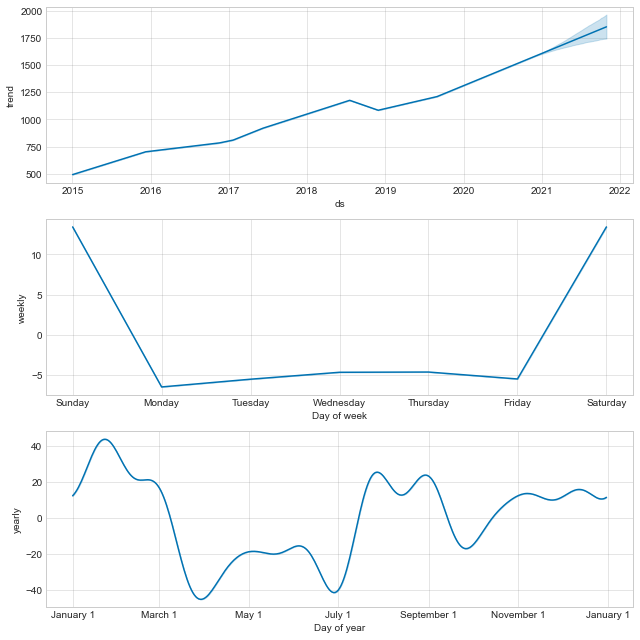

In [17]:
fig2 = m.plot_components(forecast)
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


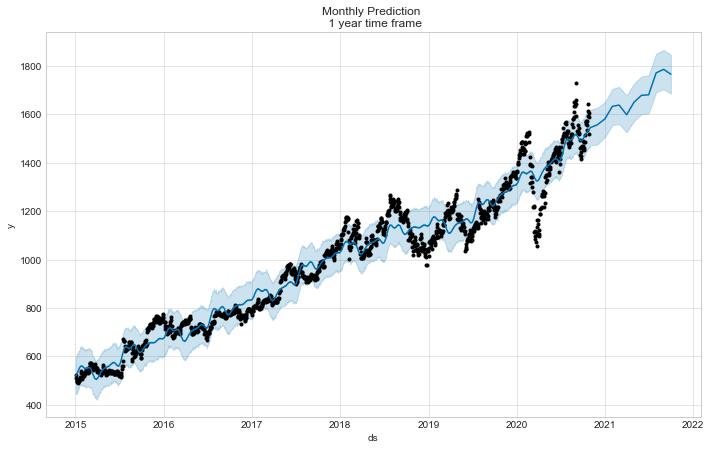

In [18]:
# Monthly Data Predictions
m = Prophet(changepoint_prior_scale=0.01).fit(ph_df)
future = m.make_future_dataframe(periods=12, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)
plt.title("Monthly Prediction \n 1 year time frame")

plt.show()

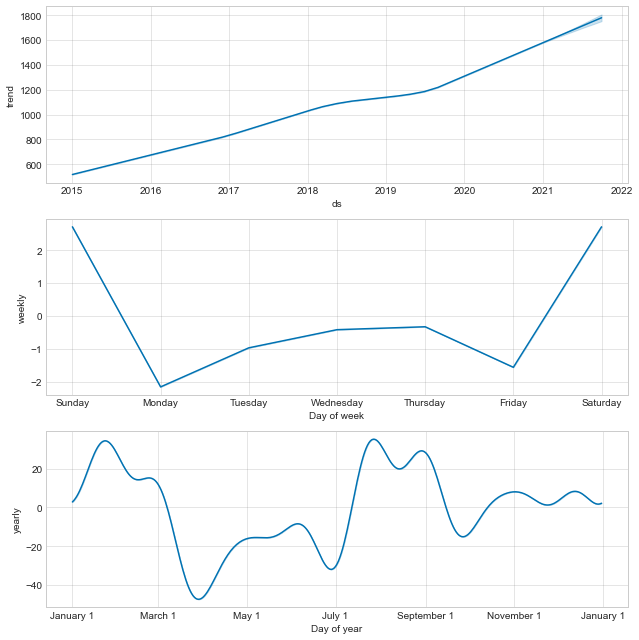

In [19]:
fig = m.plot_components(fcst)
plt.show()